In [320]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [321]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [322]:
Y_train

array([0, 6, 8, ..., 2, 1, 2])

In [323]:
def parameter():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

In [324]:
def relu(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    

In [330]:
def forward(W1, b1, W2, b2, X):
    Z1 = np.dot(W1,X) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

In [331]:
def derivative_of_relu(Z):
    return Z > 0
# i dont know why this function
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [332]:

def back(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * np.dot(dZ2,A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * derivative_of_relu(Z1)
    dW1 = 1 / m * np.dot(dZ1,X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [333]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def start(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [334]:
W1, b1, W2, b2 = start(X_train, Y_train, 0.10, 500)

Iteration:  0
[0 2 0 ... 2 2 2] [0 6 8 ... 2 1 2]
0.10139024390243903
Iteration:  10
[0 3 4 ... 2 1 2] [0 6 8 ... 2 1 2]
0.1846829268292683
Iteration:  20
[0 6 4 ... 2 1 2] [0 6 8 ... 2 1 2]
0.29492682926829267
Iteration:  30
[0 6 4 ... 2 1 2] [0 6 8 ... 2 1 2]
0.3790731707317073
Iteration:  40
[0 6 4 ... 2 1 1] [0 6 8 ... 2 1 2]
0.42448780487804877
Iteration:  50
[0 6 4 ... 2 1 1] [0 6 8 ... 2 1 2]
0.4556829268292683
Iteration:  60
[0 6 4 ... 2 1 2] [0 6 8 ... 2 1 2]
0.48180487804878047
Iteration:  70
[0 6 0 ... 2 1 2] [0 6 8 ... 2 1 2]
0.5087804878048781
Iteration:  80
[0 6 2 ... 2 1 2] [0 6 8 ... 2 1 2]
0.5360487804878049
Iteration:  90
[0 6 8 ... 2 1 2] [0 6 8 ... 2 1 2]
0.5648780487804878
Iteration:  100
[0 6 8 ... 2 1 2] [0 6 8 ... 2 1 2]
0.5897073170731707
Iteration:  110
[0 6 8 ... 2 1 2] [0 6 8 ... 2 1 2]
0.6135121951219512
Iteration:  120
[0 6 8 ... 2 1 2] [0 6 8 ... 2 1 2]
0.6336829268292683
Iteration:  130
[0 6 8 ... 2 1 2] [0 6 8 ... 2 1 2]
0.6518048780487805
Iteration:  1

In [335]:
# i copied below code as it is
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [0]
Label:  0


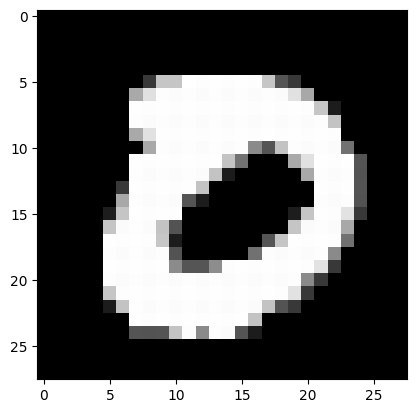

Prediction:  [6]
Label:  6


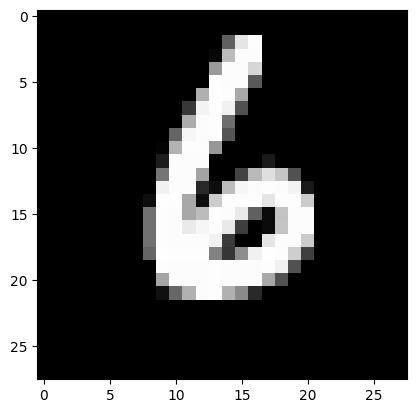

Prediction:  [8]
Label:  8


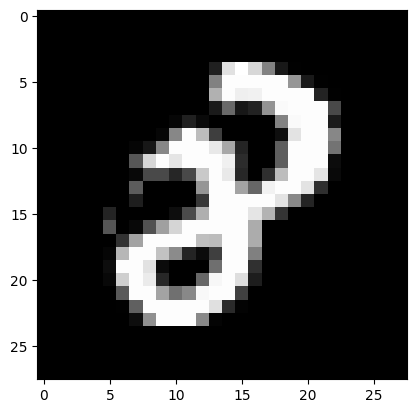

Prediction:  [5]
Label:  5


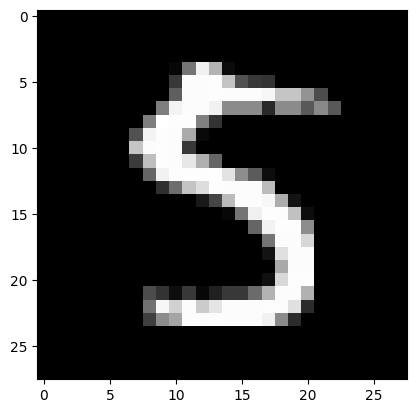

In [336]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [337]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[9 7 5 3 7 7 8 6 1 7 1 5 2 6 9 8 9 3 9 0 3 5 3 0 8 3 8 3 8 6 9 0 9 2 1 2 9
 0 3 7 5 0 2 8 4 9 8 0 9 6 9 1 1 1 3 8 6 2 9 5 8 1 8 8 9 5 5 5 2 9 9 4 1 8
 4 4 4 7 7 4 2 7 0 4 5 9 5 8 2 6 4 1 0 5 5 9 3 9 5 1 6 0 2 6 3 8 2 5 6 6 1
 2 8 1 6 6 3 7 7 3 3 3 2 0 6 4 4 0 8 0 3 5 3 0 8 1 4 8 1 6 8 2 7 8 9 6 7 0
 8 1 3 4 1 7 2 4 7 0 1 4 9 8 7 8 7 0 3 1 7 8 6 9 2 0 8 2 2 0 0 6 3 3 9 0 4
 5 3 5 6 6 9 5 4 8 4 8 6 3 0 1 6 4 2 2 8 5 0 9 0 5 8 4 8 1 6 5 9 7 0 3 8 7
 4 2 7 8 1 7 9 7 5 7 5 4 0 8 4 2 1 7 0 7 2 9 0 7 8 5 7 0 1 6 7 5 0 0 3 8 7
 9 0 4 5 4 2 4 1 9 4 1 7 2 8 9 8 7 0 7 7 6 0 6 7 7 8 6 2 9 5 2 2 3 6 3 3 2
 0 8 4 3 6 5 6 7 2 3 7 6 0 9 9 1 0 9 7 1 1 4 2 7 8 2 1 1 6 0 6 5 2 1 5 5 2
 5 0 2 4 8 4 7 3 6 4 7 8 9 1 4 1 8 4 1 6 8 3 1 4 8 8 6 6 8 4 4 6 9 7 9 5 8
 8 0 6 0 6 2 4 6 1 2 9 1 8 1 8 3 8 5 0 6 1 3 4 7 8 8 0 1 6 4 1 6 3 7 3 7 2
 8 1 3 9 4 1 1 8 0 1 0 4 8 2 5 1 9 3 1 1 3 2 8 6 6 1 2 4 9 4 3 5 6 7 0 8 1
 9 2 7 6 2 1 3 1 6 4 7 1 6 1 1 1 9 9 1 2 4 8 4 8 6 4 2 3 5 7 6 2 2 2 0 7 1
 7 6 3 3 2 6 1 8 5 1 3 3 

0.831